In [91]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

## HESE Aeffs from cascade model

In [141]:
path = "../../cascade_model/aeff_HESE/"
names = os.listdir(path)

In [142]:
aeffs = []
for name in names:  
    df = pd.read_csv(path+name, sep=" ")
    ebin_cen = (df.ebin_low.unique() + df.ebin_high.unique())/2
    costhbin_cen = (df.costhbin_low.unique() + df.costhbin_high.unique())/2
    aeff = df.aeff.values.reshape(len(ebin_cen), len(costhbin_cen))
    aeffs.append(aeff)

In [143]:
# sum
total_aeff = np.zeros_like(aeffs[0])
for aeff in aeffs:
    total_aeff += aeff

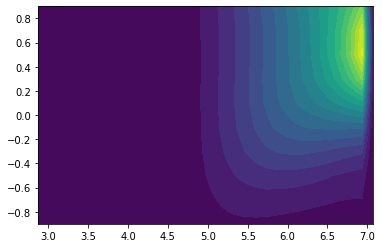

In [144]:
fig, ax = plt.subplots()
ax.contourf(ebin_cen, costhbin_cen, total_aeff.T,
            levels=20)

In [145]:
np.max(aeffs[names=="effective_area.HESE.nue.CC.txt"])

13.00824896983286

In [146]:
np.max(total_aeff) # units?

181.19080029648822

## Compare with current version of CascadeDetectorModel

In [147]:
from python.detector_model import CascadesDetectorModel
from python.backend.stan_generator import StanGenerator

In [148]:
with StanGenerator():
        dm = CascadesDetectorModel()
        effective_area = dm.effective_area
        energy_resolution = dm.energy_resolution

In [149]:
ebin_edges = effective_area._tE_bin_edges
cosz_edges = effective_area._cosz_bin_edges
ebin_cen = (ebin_edges[:-1] + ebin_edges[1:])/2
cosz_cen = (cosz_edges[:-1] + cosz_edges[1:])/2

(3.0, 7.0)

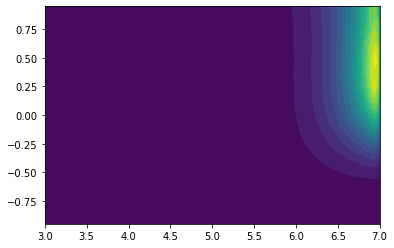

In [150]:
fig, ax = plt.subplots()
ax.contourf(np.log10(ebin_cen), cosz_cen, effective_area._eff_area.T, levels=20)
ax.set_xlim(3, 7)

In [151]:
np.max(effective_area._eff_area)

145.08302545007166

In [152]:
import h5py

In [153]:
with h5py.File("input/cascades/effective_area_HESE_nue_CC.h5", "r") as f:
    for key in f:
        print(key)

aeff
cosz_edges
rE_edges
tE_edges
